In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


In [3]:
x_data = np.array(
    [
        0.0,
        0.15789474,
        0.31578947,
        0.47368421,
        0.63157895,
        0.78947368,
        0.94736842,
        1.10526316,
        1.26315789,
        1.42105263,
        1.57894737,
        1.73684211,
        1.89473684,
        2.05263158,
        2.21052632,
        2.36842105,
        2.52631579,
        2.68421053,
        2.84210526,
        3.0,
    ]
)
y_data = np.array(
    [
        2.95258285,
        2.49719803,
        -2.1984975,
        -4.88744346,
        -7.41326345,
        -8.44574157,
        -10.01878504,
        -13.83743553,
        -12.91548145,
        -15.41149046,
        -14.93516299,
        -13.42514157,
        -14.12110495,
        -17.6412464,
        -16.1275509,
        -16.11533771,
        -15.66076021,
        -13.48938865,
        -11.33918701,
        -11.70467566,
    ]
)


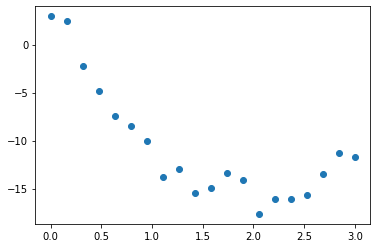

In [4]:
plt.figure()
plt.plot(x_data,y_data,'o')
plt.show()

Here is a model where $\beta=(a,b,c)$ and
$$ f(x,\beta)=f(x,a,b,c)=a(x-b)^2+c $$
We fit to find the optimal values of $ a,b,c $ that fit the data above.

In [5]:
# define the model function
def model_f(x, b, a, c):
    return a * (x - b) ** 2 + c


# use scipy curve_fit function
initial_guess = [3, 2, -16]  # a,b,c
popt, pcov = curve_fit(model_f, x_data, y_data, p0=initial_guess)


In [6]:
popt # contain optimum a,b,c values

array([  2.00492121,   4.92207992, -16.04690266])

pcov: the covariance matrix, which gives an estimate of the "error" of the parameters (based on how sensitive the "goodness-of-fit" is to changing them) and the relation the parameters have to eachother (are two seperate parameters really needed?)

In [7]:
pcov

array([[ 0.00222114, -0.01315915,  0.00322289],
       [-0.01315915,  0.12827822, -0.07363194],
       [ 0.00322289, -0.07363194,  0.13377697]])

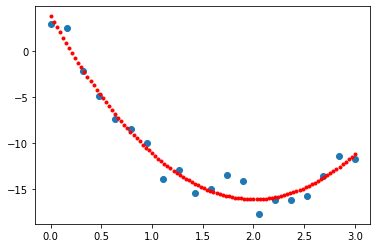

In [8]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(np.min(x_data), np.max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

plt.figure()
plt.plot(x_data,y_data,'o')
plt.plot(x_model, y_model, 'r.')
plt.show()


pcov is difficult to interpret, but we can do so as follows.

the "error" of a parameter in the model is related to how sensitive the model is to that parameter. Does changing the parameter slightly give a better fit? (i.e. minimize $\sum{(f(x_i,\beta)-y_i)^2}$ )

In [9]:
def fit_f(x, a, b, c, d):
    return a * (x - b) ** 2 + c + d * 0.0001 * np.cos(x)


initial_guess = [1, 2, -16, 1]  # a,b,c,d
popt, pcov = curve_fit(fit_f, x_data, y_data, p0=initial_guess)


In [10]:
pcov

array([[ 1.45024174e-01, -4.03732594e-02,  4.08922441e-02,
         3.05314996e+03],
       [-4.03732594e-02,  7.20537355e-02, -3.07488421e-01,
        -8.46751267e+03],
       [ 4.08922441e-02, -3.07488421e-01,  1.52776232e+00,
         3.78842426e+04],
       [ 3.05314996e+03, -8.46751267e+03,  3.78842426e+04,
         1.03326934e+09]])

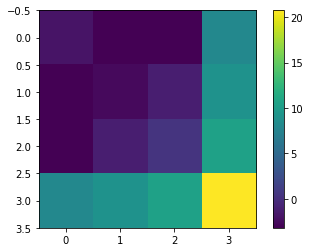

In [11]:
plt.figure()
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

# see, the error on d is high and covarance is also high
# so, changing it does not have a big effect on the model
# get rid of it!

# Examples

In [14]:
# fitting a gausian curve 

df = pd.read_csv('data/curvefite1.csv')
x_stuff = df.Channel
y_stuff = df.Cs137

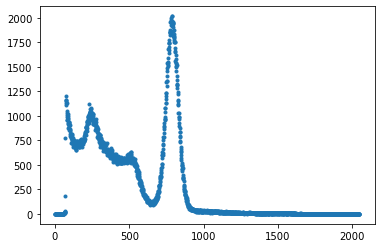

In [16]:
plt.figure()
plt.plot(x_stuff,y_stuff,'.')
plt.show()

This curve represents the photon spectrum of Cesium 137 (a common radioactive substance). The main curve represents the primary photon emission peak.

- The mean value of the peak tells us about the energy of photons emitted.
- The Width tells us about the resolution of the detector.

Typically we fit peaks like this to Gaussian curves and use $\mu$ and $\sigma$ to extract information about the two points above.

$$ f(x,A,\mu,\sigma)=Ae^{-(x-\mu^2)/\sigma^2} $$


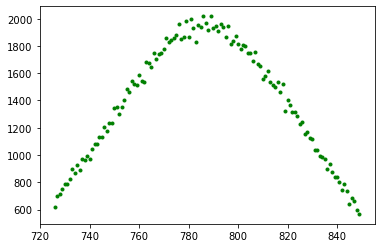

In [24]:
def gauss_f(x, A, mu, sig):
    return A * np.exp(-((x - mu) ** 2) / sig**2)

x_data = x_stuff[(x_stuff>725) & (x_stuff<850)]
y_data = y_stuff[(x_stuff>725) & (x_stuff<850)]

plt.figure()
plt.plot(x_data,y_data,'.g')
plt.show()

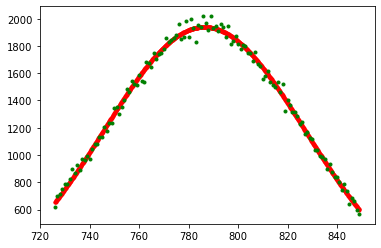

In [36]:
p_opt, p_cov = curve_fit(gauss_f,x_data,y_data,p0=[2000,790,60])

A_opt, mu_opt, sig_opt = p_opt
x_model = np.linspace(min(x_data),max(x_data),1000)
y_model = gauss_f(x_model,A_opt,mu_opt, sig_opt)

plt.figure()
plt.plot(x_model,y_model,'.r')
plt.plot(x_data,y_data,'.g')
plt.show()

In [37]:
p_opt

array([1939.55510385,  786.33851861,   57.78717218])

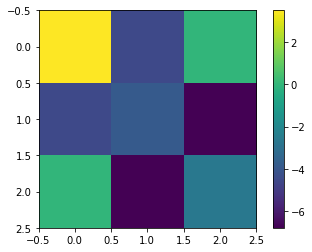

In [41]:
plt.figure()
plt.imshow(np.log(np.abs(p_cov)))
plt.colorbar()
plt.show()

In [42]:
np.sqrt(np.diag(p_cov))

# small errors on the parameters - that is great!

array([5.70257763, 0.14401935, 0.26427165])